<a href="https://colab.research.google.com/github/Alan-B525/TP_FINAL_IC2022/blob/main/RNN_TP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Recurrentes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Preprocesado de datos

In [2]:
scaler = MinMaxScaler( feature_range=(0, 1) )

ve = 120


In [3]:

def preprocessing(data):
  data = data.drop(['Date','Adj Close'], axis=1)
  data = data.round(2)

  #transformar dataframe a numpy array
  data = data.values

  #normalizar datos
  data = scaler.fit_transform(data)

  X_train = []
  y_train = []

  for i in range(ve, len(data)):
      X_train.append(data[i-ve:i, :])
      y_train.append(data[i, 0])
 
  X_train, y_train = np.array(X_train), np.array(y_train)
  


  return X_train, y_train

In [4]:
#importar datos
dataset_train = pd.read_csv('NASDAQ_train.csv')

#se llama a la funcion de procesamiento
X_train, y_train = preprocessing(dataset_train)


# Construcción de la RNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Inicialización del la red

In [6]:
regressor = Sequential()

### Añadir las capas  LSTM y  regularización por Dropout

In [7]:
regressor.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=60, return_sequences=False))
regressor.add(Dropout(rate=0.2))

### Añadir la capa de salida

In [8]:
regressor.add(Dense(units=1))

### Compilar la RNN 

In [9]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Entrenamiento de la Red Neuronal Recurrente

In [10]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=False)

# Predecir el valor de las acciones

In [14]:

dataset_test = pd.read_csv('NASDAQ_test.csv')



In [15]:
X_test, y_test = preprocessing(dataset_test)

real_stock_price = dataset_test.loc[ve:, ['Open']].values.round(2)

Realizamos la predicción.

In [16]:
# Prediccion de los valores del mes de enero 
predicted_stock_price = regressor.predict(X_test)


#Transformación de los precios

In [17]:
price_t = []

for i in range(len(predicted_stock_price)):
    x = (predicted_stock_price[i,0]*(scaler.data_max_[0]-scaler.data_min_[0]))+scaler.data_min_[0]
    price_t.append(x)


# Visualizar los resultados

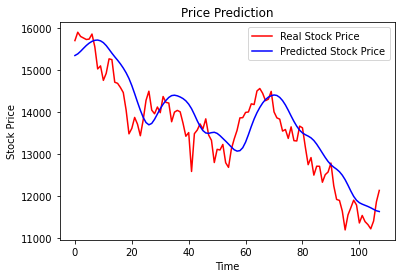

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(price_t, color = 'blue', label = 'Predicted Stock Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:


price_t = price_t.reshape(-1,1)

price_t = np.array(price_t)

price_t.shape

(108, 1)

In [55]:
real_stock_price.shape

(108, 1)

Error absoluto medio de la predicción.

In [56]:
mean_absolute_error(price_t, real_stock_price)

440.3987850073173

Valos promedio de las acciones el mes de Enero.

In [57]:
np.mean(real_stock_price)

13572.036759259261

El porcentaje de error sobre el valor de las acciones.

In [58]:
mean_absolute_error(price_t, real_stock_price) / np.mean(real_stock_price)

0.03244898262649221

Calcularmos el error de cada dia de enero y lo graficamos.

In [59]:
error = price_t - real_stock_price

Text(0, 0.5, 'Prediction error')

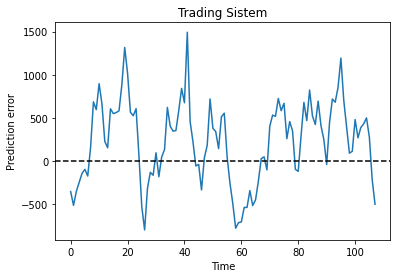

In [61]:
plt.plot(error)
plt.axhline(y=0, xmin=0, xmax=20, ls='--', color='k')
plt.title('Trading Sistem')
plt.xlabel('Time')
plt.ylabel('Prediction error')

In [62]:
import joblib
joblib.dump(regressor, 'modelo_entrenado.plk')

INFO:tensorflow:Assets written to: ram://6678b6b5-6427-47d0-a94b-e2cbbca21c0d/assets


INFO:tensorflow:Assets written to: ram://6678b6b5-6427-47d0-a94b-e2cbbca21c0d/assets


['modelo_entrenado.plk']